Live Code 2 <br>
Nama : Risqi Wahyu Permana <br>
Batch : HCK 6

## Objective
1. Menghitung tingkat similaritas antara dua vektor
2. Melihat central tedency dan megatasi extreme value sesuai persebaran datanya.

## Query yang dipakai di Google Cloud Platform
```sql
SELECT sale_dollars FROM `bigquery-public-data.iowa_liquor_sales.sales` LIMIT 5000
```

## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 1

### Answer

Kalimat 1: Julie loves me more than Linda loves me<br>
Kalimat 2: Jane likes me more than Julie loves me

In [2]:
kalimat_1 = np.array([2,0,1,1,0,2,1,1])
kalimat_2 = np.array([2,1,1,0,1,1,1,1])

#menghitung cos theta
cos_theta = np.dot(kalimat_1, kalimat_2) / (np.linalg.norm(kalimat_1) * np.linalg.norm(kalimat_2))
print(cos_theta)

0.8215838362577491


### Result

Question : <br>
a. Apakah kedua kalimat memiliki konteks yang serupa? jika iya, mengapa dan jika tidak, mengapa (jawab berdasarkan hasil perhitungan cosine similaritynya)? <br><br>

b. Jika meninjau dua buah vektor dan dihitung cosine similaritynya (cos theta), jelaskan secara singkat, jelas, padat apa makna cosine similarity yang bernilai 0 dan 1 (tinjau dari posisi dua vektor di koordinat kartesian)?<br><br>

c. Mengapa cosine similarity harus melibatkan vektor bukan matriks?<br><br>
Answer :<br>

a. Kedua kalimat diatas memiliki konteks yang serupa. Hal ini berdasarkan hasil cosine similarty yang fungsinya mengukur jarak antar dua vektor menunjukan angka similarity yaitu 0,8. Angka tersebut sangat mendekati angka 1 yang dimana artinya jika cosine similarity itu sama dengan 1, kedua vektor tersebut sangat mirip.

b. Jika terdapat dua vektor pada koordinat kartesius, masing - masing vektor tersebut akan membuat sebuah garis. dan antara kedua garis tersebut akan membentuk sebuah sudut. Jika semakin kecil sudut tersebut, maka kedua vektor akan semakin sama, kebalikannya jika semakin lebar sudut tersebut, maka kedua vektor semakin tidak mirip.

c. Karena matriks sendiri adalah susunan dari vektor. umumnya perhitungan cosine similarity melibatkan dua vektor, namun ada juga perhitungan cosine similarity matriks. Cosine similarity matriks tidak cukup bagus karena, lebih kompleks dan tidak efisien.

## Problem 2

### Load Dataset

In [3]:
#Load dataset
df_sales = pd.read_csv('h8dsft_P0LC2_Risqi_Wahyu_Permana.csv')
df_sales.head()

,sale_dollars
0,7.40
1,8.45
2,14.25
3,560.64
4,560.64


In [4]:
df_sales.tail()

,sale_dollars
4995,99.12
4996,99.12
4997,99.12
4998,99.24
4999,99.24


### Answer

#### Central Tendency

In [5]:
#central tendency
print('mean: ', df_sales['sale_dollars'].mean())
print('median: ', df_sales['sale_dollars'].median())
print('mode: ', df_sales['sale_dollars'].mode())

mean:  226.37297399999997
median:  123.12
mode:  0    94.2
Name: sale_dollars, dtype: float64


#### Mengecek Persebaran Data

In [6]:
#Function to plot distribution
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

In [7]:
df_col = df_sales.columns.to_list()
df_col

['sale_dollars']

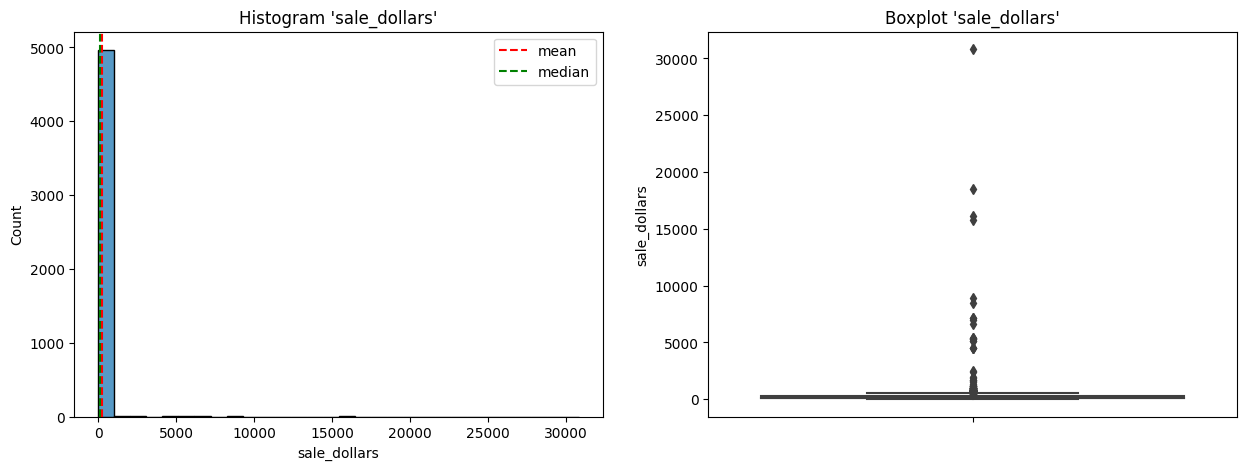

sale_dollars Kurtosis: 949.1584916125489
sale_dollars Skewness: 26.991905484657437
Columns 'sale_dollars' right skewed


In [8]:
plot_dist(df_sales, df_col[0])

#### Menghilangkan Extreme Value

In [9]:
#remove outliers from df_tds use tukey's rule
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (3 * IQR)
    upper_bound = Q3 + (3 * IQR)
    
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

In [10]:
df_sales_no_outliers = remove_outliers(df_sales, df_col[0])

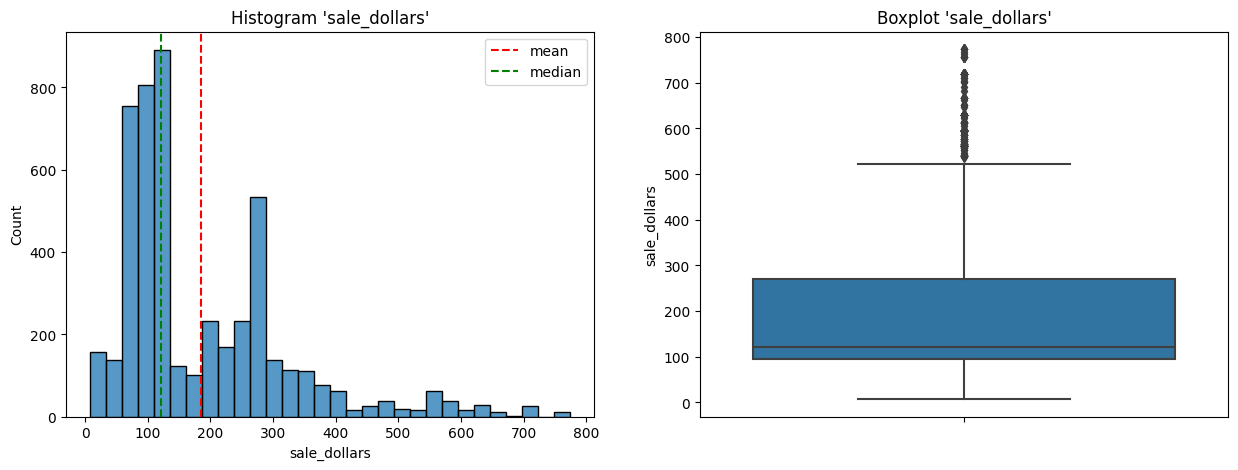

sale_dollars Kurtosis: 2.3999159279005817
sale_dollars Skewness: 1.5155424518569316
Columns 'sale_dollars' right skewed


In [11]:
plot_dist(df_sales_no_outliers, df_col[0])

### Result

Question :
1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu!
2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu!
3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data!

Answer : 
1. Central Tedency :<br>
mean:  226.37297399999997 <br>
median:  123.12 <br>
mode:  0    94.2 <br>
Dari Central Tendency dapat dilihat bahwa rata - rata lebih besar median. Dapat dilihat pada grafik bahwa data berkumpul di sebelah kiri dan menggambarkan ekor dari data ke arah kanan. 

2. Data diatas mengalami postive skewed. Karena dari grafik dapat terlihat banyak angka outliers yang lebih tinggi dari rata - ratanya. Sehingga dapat terlihat ekor data yang banyak ke kanan.

3. Teknik yang digunakan adalah tukey's rule. Hal ini di akibatkan distribusi data yang tidak normal. Nilai Skewness yang didapat adalah 26.991905484657437, dimana angka tersebut melebihi dari angka 1 dan -1. Sehingga dapat digolongkan sebagai highly skewed. Untuk itu IQR akan dikalikan dengan angka 3.
